In [34]:
import pandas as pd

# Load the Stata file
file_path = r'C:\Users\clint\Desktop\Coding Task Darthmouth\lottery_study\lottery_study\lottery_study.dta'
df = pd.read_stata(file_path)

# Display the first few rows of the dataframe
df

C:\Users\clint\AppData\Local\Temp\ipykernel_27012\2998904404.py:5: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  df = pd.read_stata(file_path)


,ideology,religion,risk_seeking,expend_total,seems_fun,enjoy_thinking,self_control,risk_aversion,gender,age,...,overconfidence,lottery_payout,happiness,financial_literacy,financial_numeracy,gamblers_fallacy,non_belief_lln,ev_miscalculation,income_effects_delta_pct,state
0,Extremely Conservative,1.0,-3,0.0,-3 - Strongly Disagree,-3 - Strongly Disagree,0 - The right amount,Average financial risks expecting to earn aver...,Male,72.0,...,0.0,0.35,3.0,0.8,0.666667,0.666667,0.138633,0.50,0.0,AK
1,Moderate,0.0,-4,10.0,0 - Neutral,0 - Neutral,0 - The right amount,Average financial risks expecting to earn aver...,Female,61.0,...,1.0,0.25,5.0,1.0,1.000000,0.000000,0.427033,0.50,7.5,AK
2,Slightly Conservative,1.0,-4,0.0,0 - Neutral,1,0 - The right amount,Above-average financial risks expecting to ear...,Male,30.0,...,0.0,0.25,0.0,1.0,1.000000,0.000000,0.597033,1.00,0.0,AK
3,Slightly Liberal,0.0,-3,0.0,0 - Neutral,3 - Strongly Agree,-3 - Far too little,Above-average financial risks expecting to ear...,Female,68.0,...,0.0,0.75,9.0,0.6,0.333333,0.000000,0.510367,1.00,-50.0,AK
4,Conservative,1.0,-4,1.0,1,3 - Strongly Agree,0 - The right amount,Average financial risks expecting to earn aver...,Male,68.0,...,0.0,0.45,1.0,1.0,1.000000,0.000000,0.427033,0.75,NaN,AL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2885,Liberal,0.0,-4,10.0,2,2,0 - The right amount,Average financial risks expecting to earn aver...,Male,66.0,...,0.1,0.55,9.0,0.6,1.000000,1.000000,0.122900,0.75,0.0,WV
2886,Conservative,0.0,-7 - Very willing,10.0,1,1,0 - The right amount,Average financial risks expecting to earn aver...,Male,28.0,...,0.0,0.05,1.0,1.0,0.666667,0.000000,0.427033,1.00,0.0,WY
2887,Extremely Liberal,0.0,-4,1.0,1,1,0 - The right amount,Above-average financial risks expecting to ear...,Female,67.0,...,0.0,0.05,-1.0,1.0,0.666667,0.666667,0.460367,1.00,0.0,WY
2888,Conservative,1.0,-3,0.0,0 - Neutral,-2,0 - The right amount,Average financial risks expecting to earn aver...,Female,57.0,...,0.0,0.25,5.0,1.0,0.666667,0.666667,0.273700,0.50,0.0,WY


In [35]:
# List all the columns in the dataframe
columns = df.columns
columns

Index(['ideology', 'religion', 'risk_seeking', 'expend_total', 'seems_fun',
       'enjoy_thinking', 'self_control', 'risk_aversion', 'gender', 'age',
       'marital', 'employment', 'urban', 'education', 'income', 'white',
       'black', 'hispanic', 'income_delta', 'expend_delta', 'overconfidence',
       'lottery_payout', 'happiness', 'financial_literacy',
       'financial_numeracy', 'gamblers_fallacy', 'non_belief_lln',
       'ev_miscalculation', 'income_effects_delta_pct', 'state'],
      dtype='object')

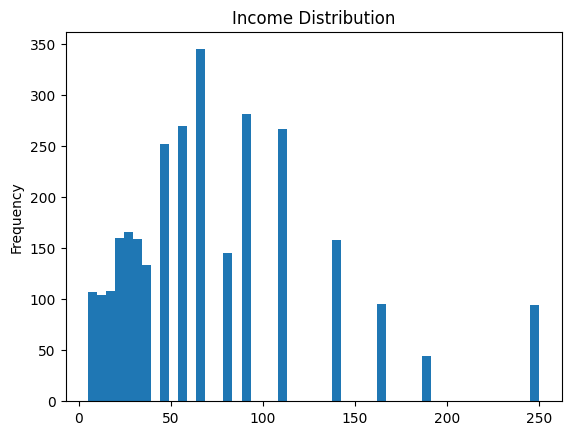

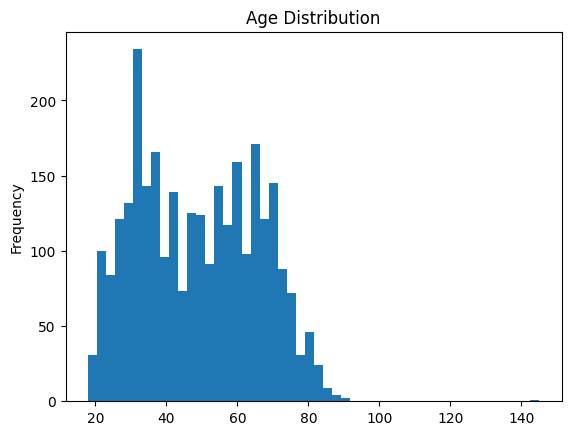

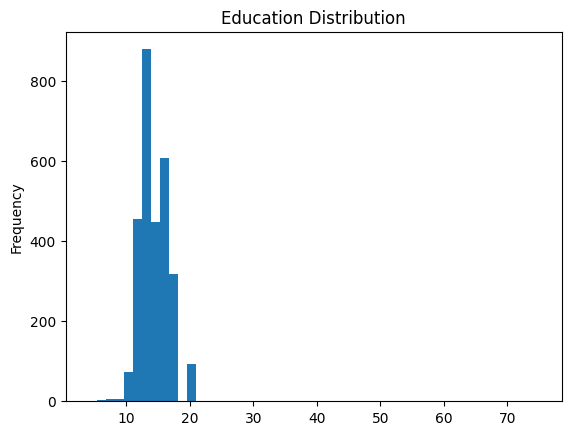

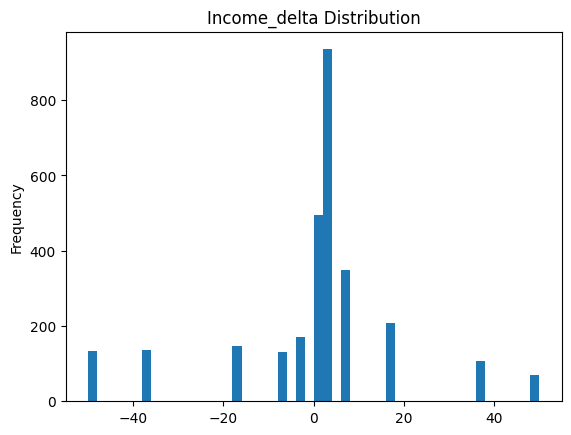

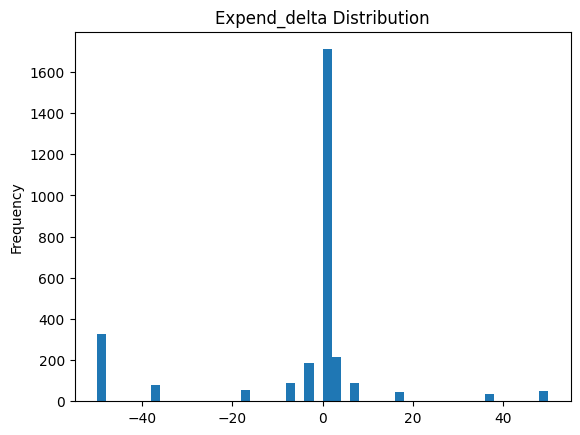

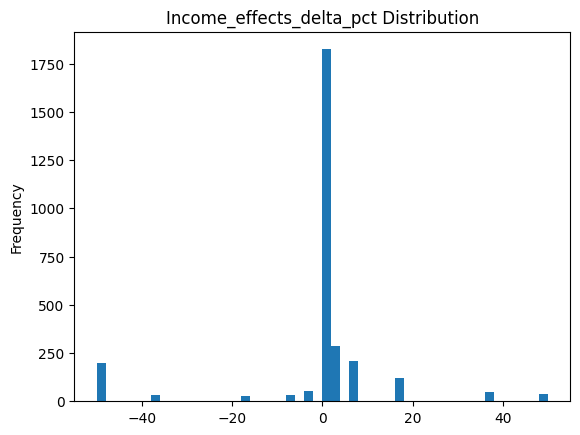

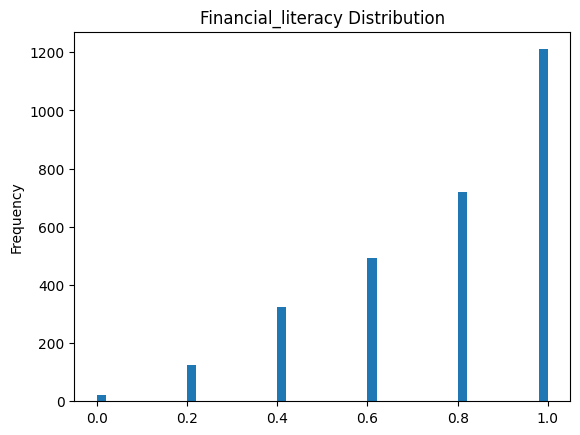

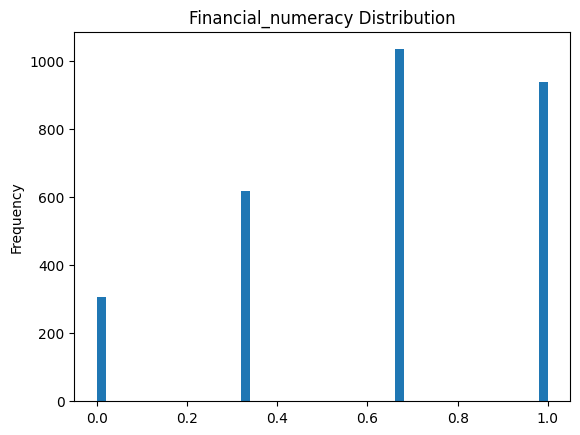

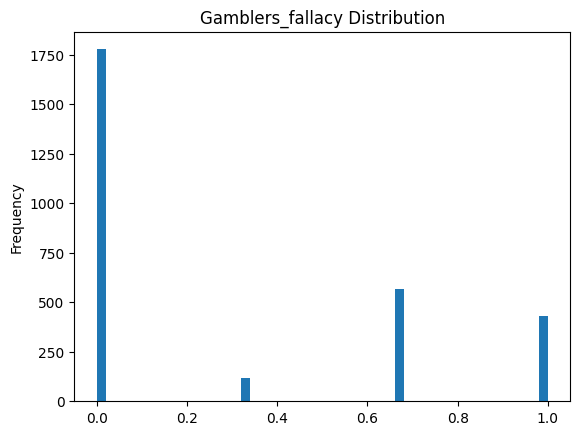

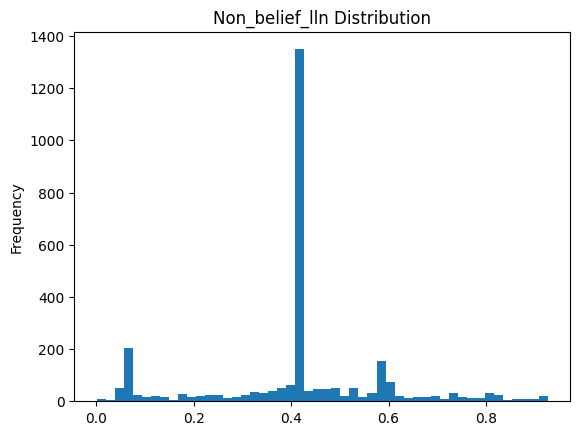

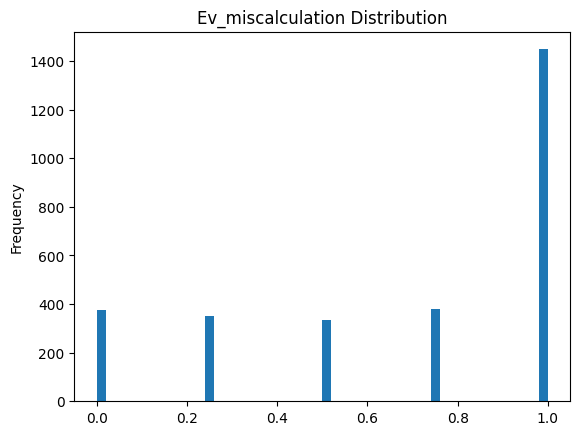

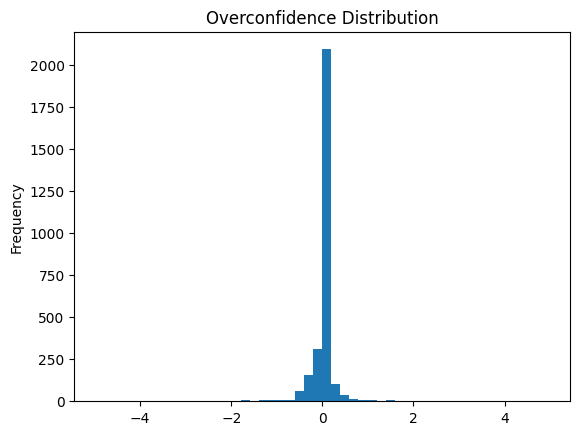

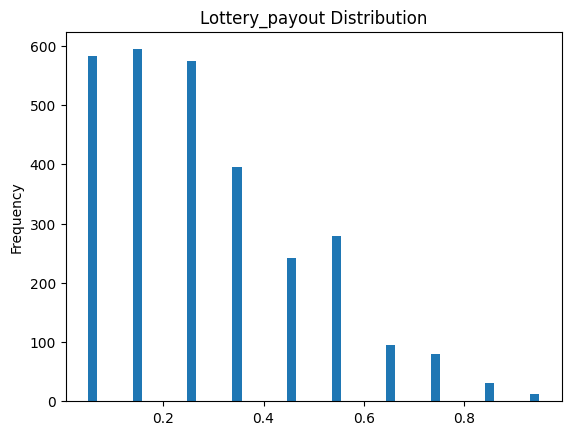

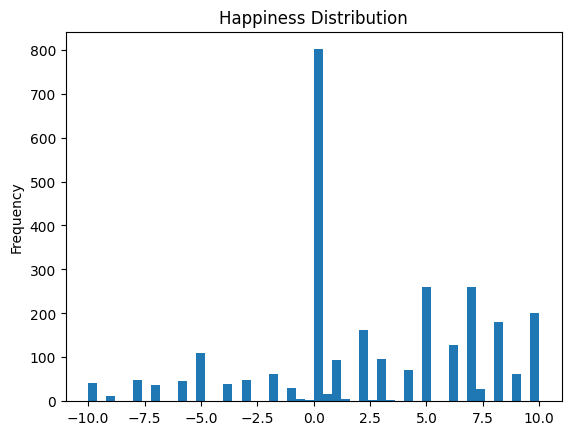

In [36]:
import matplotlib.pyplot as plt

def plot_distributions(df, columns):
    for column in columns:
        df[column].plot(kind='hist', bins=50, title=f'{column.capitalize()} Distribution')
        plt.show()

# Call the function with the desired columns
plot_distributions(df, ['income', 'age','education','income_delta','expend_delta','income_effects_delta_pct','financial_literacy','financial_numeracy','gamblers_fallacy'
                        ,'non_belief_lln','ev_miscalculation','overconfidence','lottery_payout','happiness'])


In [37]:
#exported expend_total for study
df[['expend_total']].to_csv('expend_total.csv', index=False)

In [38]:
df['expend_total'] = pd.to_numeric(df['expend_total'], errors='coerce')


In [39]:
# Show the highest values in expend_total
highest_expend_total = df['expend_total'].nlargest(10)
print(highest_expend_total)

2422    100000.0
240       1900.0
1687      1500.0
1956      1248.0
672       1200.0
2357      1200.0
745       1000.0
1807      1000.0
2811      1000.0
828        700.0
Name: expend_total, dtype: float64


In [40]:
# Define the threshold for outliers
threshold = 90000.0

# Filter out the outliers
df = df[df['expend_total'] <= threshold]


In [41]:
#threshold = 1400

# Filter out the outliers
df = df[df['expend_total'] <= threshold]


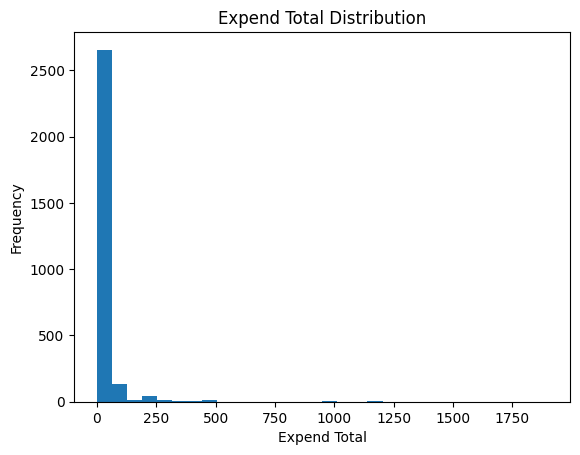

In [42]:

df['expend_total'].plot(kind='hist', bins=30, title='Expend Total Distribution')
plt.xlabel('Expend Total')
plt.ylabel('Frequency')
plt.show()

In [43]:
unique_expend_total_values = df['expend_total'].unique()

print("Unique values in 'expend_total' column:", unique_expend_total_values)

Unique values in 'expend_total' column: [0.000e+00 1.000e+01 1.000e+00 2.000e+01 3.000e+00 2.500e+01 7.000e+00
 5.500e+01 3.000e+01 4.000e+01 5.000e+00 4.000e+00 2.000e+00 5.000e+01
 5.000e+02 6.000e+00 2.000e+02 3.500e+01 1.000e+02 8.000e+00 1.500e+01
 8.000e+01 1.900e+03 6.000e+01 4.800e+01 3.000e+02 1.600e+01 2.400e+01
 1.900e+02 1.200e+01 7.500e+01 6.000e+02 1.700e+01 1.500e+02 1.200e+03
 1.000e+03 5.900e+01 1.200e+02 7.000e+02 8.500e+01 1.600e+02 4.000e+02
 9.000e+00 8.800e+01 2.600e+01 1.250e+02 7.000e+01 2.080e+02 2.500e+02
 1.040e+02 2.750e+02 1.500e+03 2.200e+01 6.500e+01 1.248e+03 3.500e+02
 1.400e+01 3.600e+02 3.200e+01 3.600e+01 4.500e+01 9.000e+01]


In [44]:

def get_unique_values(df, columns):
    unique_values = {}
    for column in columns:
        unique_values[column] = df[column].unique()
    return unique_values

columns_to_check = ['black','hispanic','white', 'gender', 'marital', 'urban', 'employment', 'religion','ideology','state','expend_total','risk_seeking','risk_aversion','seems_fun'
                    ,'enjoy_thinking','self_control','happiness']
unique_values = get_unique_values(df, columns_to_check)
for column, values in unique_values.items():
    print(f"Unique values in '{column}' column:", values)

Unique values in 'black' column: [0. 1.]
Unique values in 'hispanic' column: [0. 1.]
Unique values in 'white' column: [1. 0.]
Unique values in 'gender' column: ['Male', 'Female']
Categories (2, object): ['Male' < 'Female']
Unique values in 'marital' column: ['Married', 0.0]
Categories (2, object): [0.0 < 'Married']
Unique values in 'urban' column: ['Metro Area', 'Non-Metro Area']
Categories (2, object): ['Non-Metro Area' < 'Metro Area']
Unique values in 'employment' column: [0. 1.]
Unique values in 'religion' column: [1. 0.]
Unique values in 'ideology' column: ['Extremely Conservative', 'Moderate', 'Slightly Conservative', 'Slightly Liberal', 'Conservative', 'Liberal', 'Extremely Liberal', NaN]
Categories (7, object): ['Extremely Liberal' < 'Liberal' < 'Slightly Liberal' < 'Moderate' < 'Slightly Conservative' < 'Conservative' < 'Extremely Conservative']
Unique values in 'state' column: ['AK', 'AL', 'AR', 'AZ', 'CA', ..., 'VT', 'WA', 'WI', 'WV', 'WY']
Length: 51
Categories (51, object):